# LOAN PROJECT

In [2]:
import pandas as pd

In [3]:
# Load datasets
credit_train=pd.read_csv("C:/Users/Priya/Desktop/DS class/Machine Learning/ML projects/loan/credit_train.csv")
credit_test=pd.read_csv("C:/Users/Priya/Desktop/DS class/Machine Learning/ML projects/loan/credit_test.csv")

In [4]:
# Display basic info and class distribution
credit_train.info(), credit_train["Loan Status"].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100514 entries, 0 to 100513
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       100000 non-null  object 
 1   Customer ID                   100000 non-null  object 
 2   Loan Status                   100000 non-null  object 
 3   Current Loan Amount           100000 non-null  float64
 4   Term                          100000 non-null  object 
 5   Credit Score                  80846 non-null   float64
 6   Annual Income                 80846 non-null   float64
 7   Years in current job          95778 non-null   object 
 8   Home Ownership                100000 non-null  object 
 9   Purpose                       100000 non-null  object 
 10  Monthly Debt                  100000 non-null  float64
 11  Years of Credit History       100000 non-null  float64
 12  Months since last delinquent  46859 non-null

(None,
 Loan Status
 Fully Paid     77361
 Charged Off    22639
 Name: count, dtype: int64)

In [5]:
# 1.Import Required Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [6]:
# 2.load dataset
df=pd.read_csv("C:/Users/Priya/Desktop/DS class/Machine Learning/ML projects/loan/credit_train.csv")

In [7]:
df

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100509,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# 3. Basic EDA
print("\n📌 Data Overview:")
print(df.info())
print("\n🔍 Missing Values:")
print(df.isnull().sum().sort_values(ascending=False))
print("\n🎯 Target Distribution:")
print(df["Loan Status"].value_counts())


📌 Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100514 entries, 0 to 100513
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       100000 non-null  object 
 1   Customer ID                   100000 non-null  object 
 2   Loan Status                   100000 non-null  object 
 3   Current Loan Amount           100000 non-null  float64
 4   Term                          100000 non-null  object 
 5   Credit Score                  80846 non-null   float64
 6   Annual Income                 80846 non-null   float64
 7   Years in current job          95778 non-null   object 
 8   Home Ownership                100000 non-null  object 
 9   Purpose                       100000 non-null  object 
 10  Monthly Debt                  100000 non-null  float64
 11  Years of Credit History       100000 non-null  float64
 12  Months since last delinque

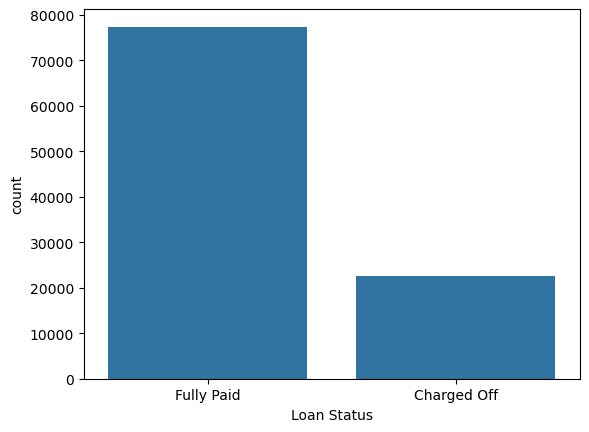

In [9]:
# Vizualization
sns.countplot(x='Loan Status',data=df)
plt.show()

In [10]:
# 4. Target Encoding
df["Loan Status"] = df["Loan Status"].map({"Fully Paid": 0, "Charged Off": 1})

In [11]:
# ⚠️ Drop rows where target is NaN
df = df.dropna(subset=["Loan Status"])

In [12]:
# 5. Feature Engineering
df["dti"] = df["Monthly Debt"] / (df["Annual Income"] + 1)
df["loan_to_income"] = df["Current Loan Amount"] / (df["Annual Income"] + 1)
df["loan_term_months"] = df["Term"].map({"Short Term": 36, "Long Term": 60})
df["monthly_installment_est"] = df["Current Loan Amount"] / (df["loan_term_months"] + 1)

C:\Users\Priya\AppData\Local\Temp\ipykernel_17728\1799714367.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["dti"] = df["Monthly Debt"] / (df["Annual Income"] + 1)
C:\Users\Priya\AppData\Local\Temp\ipykernel_17728\1799714367.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["loan_to_income"] = df["Current Loan Amount"] / (df["Annual Income"] + 1)
C:\Users\Priya\AppData\Local\Temp\ipykernel_17728\1799714367.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

In [13]:
def score_bucket(score):
    if pd.isna(score):
        return "Unknown"
    elif score >= 750:
        return "Excellent"
    elif score >= 700:
        return "Good"
    elif score >= 650:
        return "Fair"
    else:
        return "Poor"
df["credit_score_bucket"] = df["Credit Score"].apply(score_bucket)

C:\Users\Priya\AppData\Local\Temp\ipykernel_17728\3719043431.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["credit_score_bucket"] = df["Credit Score"].apply(score_bucket)


In [14]:
def parse_years(val):
    if pd.isna(val):
        return np.nan
    if val == "10+ years":
        return 10
    if val == "< 1 year":
        return 0.5
    return float(val.split()[0])

df["years_in_job_num"] = df["Years in current job"].apply(parse_years)

C:\Users\Priya\AppData\Local\Temp\ipykernel_17728\538762914.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["years_in_job_num"] = df["Years in current job"].apply(parse_years)


In [15]:
#Creates binary features indicating missing values
# Missing value flags
df["Credit_Score_missing"] = df["Credit Score"].isnull().astype(int)
df["Annual_Income_missing"] = df["Annual Income"].isnull().astype(int)
df["Delinquent_missing"] = df["Months since last delinquent"].isnull().astype(int)

C:\Users\Priya\AppData\Local\Temp\ipykernel_17728\886459043.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Credit_Score_missing"] = df["Credit Score"].isnull().astype(int)
C:\Users\Priya\AppData\Local\Temp\ipykernel_17728\886459043.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Annual_Income_missing"] = df["Annual Income"].isnull().astype(int)
C:\Users\Priya\AppData\Local\Temp\ipykernel_17728\886459043.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

In [16]:
# Drop unused columns
drop_cols = ['Loan ID', 'Customer ID', 'Years in current job', 'Term']
df.drop(columns=drop_cols, inplace=True)

C:\Users\Priya\AppData\Local\Temp\ipykernel_17728\3047344790.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=drop_cols, inplace=True)


In [17]:
# 6. Handle Missing Values
from sklearn.impute import SimpleImputer
num_cols = df.select_dtypes(include=["float64", "int64"]).columns.tolist()
num_cols.remove("Loan Status")
imputer = SimpleImputer(strategy="mean")
df[num_cols] = imputer.fit_transform(df[num_cols])

C:\Users\Priya\AppData\Local\Temp\ipykernel_17728\4080369873.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[num_cols] = imputer.fit_transform(df[num_cols])


In [18]:
# 7. Encode Categorical Columns
cat_cols = df.select_dtypes(include="object").columns.tolist()
le_dict = {}
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    le_dict[col] = le

C:\Users\Priya\AppData\Local\Temp\ipykernel_17728\1224285550.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col].astype(str))
C:\Users\Priya\AppData\Local\Temp\ipykernel_17728\1224285550.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col].astype(str))
C:\Users\Priya\AppData\Local\Temp\ipykernel_17728\1224285550.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

In [19]:
# 8. Scale Numerical Features
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

C:\Users\Priya\AppData\Local\Temp\ipykernel_17728\1216797901.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[num_cols] = scaler.fit_transform(df[num_cols])


In [20]:
# 9. Split Data
X = df.drop("Loan Status", axis=1)
y = df["Loan Status"]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [21]:
# 10. Train and Evaluate Models
def evaluate_model(model, name):
    model.fit(X_train, y_train)
    preds = model.predict(X_val)
    print(f"\n🔍 {name} Evaluation")
    print(confusion_matrix(y_val, preds))
    print(classification_report(y_val, preds))
    print(f"✅ Accuracy: {accuracy_score(y_val, preds):.4f}")

In [22]:
# Logistic Regression
evaluate_model(LogisticRegression(max_iter=1000), "Logistic Regression")


🔍 Logistic Regression Evaluation
[[15472     0]
 [ 3594   934]]
              precision    recall  f1-score   support

         0.0       0.81      1.00      0.90     15472
         1.0       1.00      0.21      0.34      4528

    accuracy                           0.82     20000
   macro avg       0.91      0.60      0.62     20000
weighted avg       0.85      0.82      0.77     20000

✅ Accuracy: 0.8203


In [23]:
# Random Forest
evaluate_model(RandomForestClassifier(n_estimators=100, class_weight="balanced"), "Random Forest")


🔍 Random Forest Evaluation
[[15347   125]
 [ 3474  1054]]
              precision    recall  f1-score   support

         0.0       0.82      0.99      0.90     15472
         1.0       0.89      0.23      0.37      4528

    accuracy                           0.82     20000
   macro avg       0.85      0.61      0.63     20000
weighted avg       0.83      0.82      0.78     20000

✅ Accuracy: 0.8200


In [24]:
# K-Nearest Neighbors
evaluate_model(KNeighborsClassifier(n_neighbors=5), "K-Nearest Neighbors")


🔍 K-Nearest Neighbors Evaluation
[[14512   960]
 [ 3151  1377]]
              precision    recall  f1-score   support

         0.0       0.82      0.94      0.88     15472
         1.0       0.59      0.30      0.40      4528

    accuracy                           0.79     20000
   macro avg       0.71      0.62      0.64     20000
weighted avg       0.77      0.79      0.77     20000

✅ Accuracy: 0.7944
